In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package wordnet to /Users/maria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maria/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/maria/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [4]:
data = ''

with open('Harry1.txt', 'r') as f:
    data = f.read()

stopp = """"!\"/«#%$?,.'’:;(»)@&[{]}%*_<>+="""

raw = data.split('—')
raw = [w.strip('—') for w in raw]
data = ' '.join(raw)

raw = data.split()
raw = [word.strip(stopp).lower() for word in raw]
ans = [wnl.lemmatize(word, pos='v') for word in raw]

with open('Harry1_lemm.txt', 'w') as f:
    f.write(' '.join(ans))

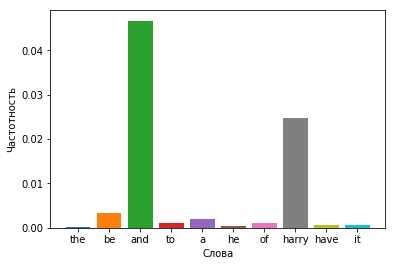

In [25]:
import collections
import numpy as np
np.random.seed(19680801)

c = collections.Counter()

for word in ans:
    c[word] += 1

fig, ax = plt.subplots()

N = 10 #кол-во слов для отображения

X = [x for x in range(N)]
Y = [y/len(ans) for y in c.values()]
ax.set_xticks(np.arange(N))
ax.set_xticklabels([w[0] for w in c.most_common(N)])
ax.set_xlabel('Слова')
ax.set_ylabel('Частотность')

for i in range(len(X)):
    plt.bar(X[i], Y[i])

plt.show()

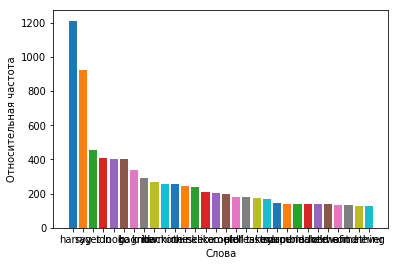

In [26]:
from nltk.corpus import stopwords

sw = stopwords.words('english')
filtered_data = [w for w in ans if w not in sw]

fig, ax = plt.subplots()

c2 = collections.Counter()

for word in filtered_data:
    if word != '':
        c2[word] += 1

X = [x for x in range(30)]

mst_c = c2.most_common(30)

for i in range(len(X)):
    plt.bar(X[i], mst_c[i][1])
ax.set_xlabel('Слова')
ax.set_ylabel('Относительная частота')
ax.set_xticks(np.arange(len(mst_c)))
ax.set_xticklabels([w[0] for w in mst_c])

plt.show()